# Kümeleme

* Kümeleme bir veri setinde benzer özellikler gösteren verilerin gruplara ayrılmasına denir.
* Gözetimsiz öğrenme yöntemidir.

##  K-Ortalama Kümeleme

* K - Ortalama Kümeleme, N adet veri nesnesinden oluşan bir veri kümesini giriş parametresi olarak K adet kümeye bölümlemektedir.
* K - Ortalama en sık kullanılan kümeleme algoritmalarındandır. Uygulanması kolaydır. Büyük ölçekli verileri hızlı ve etkin şekilde kümeleyebilir.
* K - Ortalama algoritması karesel hatayı en küçük yapacak olan K adet kümeyi tespit etmeye çalışmaktadır.
* Algoritma temel olarak 4 aşamadan oluşur:
    1. Küme merkezlerinin belirlenmesi
    2. Merkez dışındaki verilerin mesafelerine göre kümelendirilmesi
    3. Yapılan kümelendirilmeye göre yeni merkezlerin belirlenmesi veya eski merkezlerin yeni merkezlere kaydırılması
    4. Kararlı hale gelinene kadar 3. ve 3. adımların tekrarlanması

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# küme 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)
# Oluşturulan rasgele sayıların ortalaması 25 olacaktır.
# İkinci parametre olan 5, normal dağılımın standart sapmasını belirtir.
# Üçüncü parametre olan 1000, oluşturulacak rasgele sayıların sayısını belirtir.

# küme 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# küme 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1,y2,y3), axis=0)

dictionary = {"x" : x,
              "y" : y}

data = pd.DataFrame(dictionary)

In [5]:
data.head()

,x,y
0,15.815742,19.202239
1,26.118640,12.710926
2,33.878832,9.815407
3,19.035170,22.308027
4,26.625418,31.040841


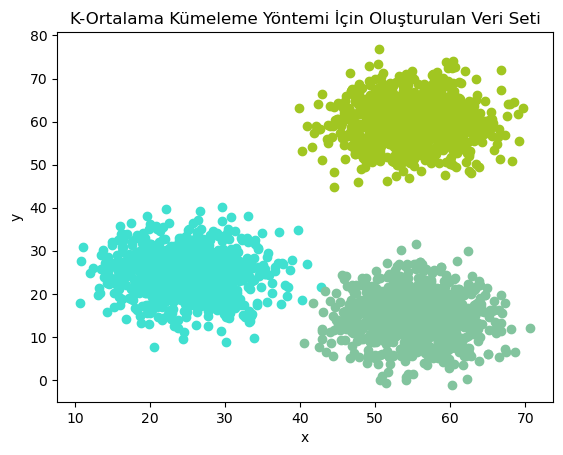

In [7]:
plt.figure()
plt.scatter(x1, y1, color = "#40e0d0")
plt.scatter(x2, y2, color = "#a1c621")
plt.scatter(x3, y3, color = "#82c49e")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

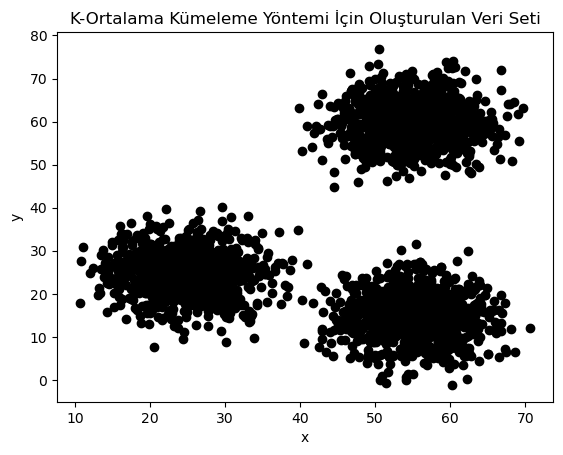

In [8]:
# k ortalama algoritması veriyi böyle görecek
plt.figure()
plt.scatter(x1, y1, color = "black")
plt.scatter(x2, y2, color = "black")
plt.scatter(x3, y3, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

#### K Değerinin Seçimi
* K değerini seçmek için dirsek yöntemini kullanacağız.
* Bu yönteme göre en uygun K değeri dirsek görünümünün oluştuğu bölgedeki K değeridir.

In [9]:
# k ortalamayı içe aktar
from sklearn.cluster import KMeans

In [12]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
# kmeans.inertia_ özelliği kullanılarak WCSS değeri elde edilir. 
# WCSS, her bir veri noktasının kendi küme merkezine olan uzaklıklarının karelerinin toplamını ifade eder.    

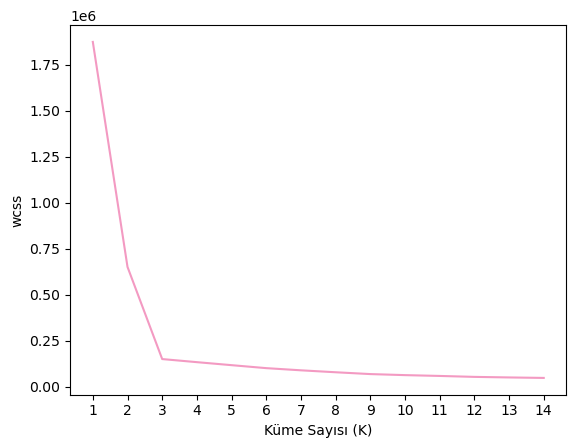

In [15]:
plt.figure()
plt.plot(range(1,15), wcss, color = "#f39ac2")
plt.xticks(range(1,15))
plt.xlabel("Küme Sayısı (K)")
plt.ylabel("wcss")
plt.show()

#### K-Ortalama Kümeleme Algoritması Eğitimi ve Testi
* K = 3 değeri için, 3-Ortalama kümeleme yöntemini eğitip, testini yapıp sonrasında görselleştireceğiz.

In [17]:
k_ortalama = KMeans(n_clusters=3)
kumeler = k_ortalama.fit_predict(data)

In [19]:
data["label"] = kumeler

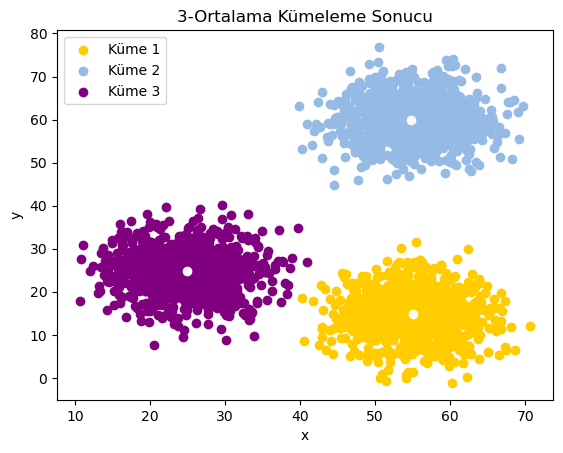

In [25]:
plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color="#ffcc00", label="Küme 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color="#95bae4", label="Küme 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color="#800080", label="Küme 3")
plt.scatter(k_ortalama.cluster_centers_[:,0], k_ortalama.cluster_centers_[:,1], color="#fafafa")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

## Hiyerarşik Kümeleme

* Hiyerarşik kümeleme, bir küme hiyerarşisi oluşturmaya çalışan bir küme analizi yöntemidir.
* Hiyerarşik kümeleme stratejileri genellikle iki türe ayrılır:
    1. Aglomeratif: Bu "aşağıdan yukarıya" bir yaklaşımdır. Her gözlem kendi kümesinde başlar ve hiyerarşide yukarı çıktıkça küme çiftleri birleştirilir.
    2. Bölücü: Bu "yukarıdan aşağıya" bir yaklaşımdır. Tüm gözlemler tek bir kümede başlar ve bölmeler, hiyerarşide aşağı doğru ilerlerken yinelemeli olarak gerçekleştirilir.

In [26]:
# küme 1
x1 = np.random.normal(25,5,20)
y1 = np.random.normal(25,5,20)

# küme 2
x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

# küme 3
x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)

x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1,y2,y3), axis=0)

dictionary = {"x" : x,
              "y" : y}

data = pd.DataFrame(dictionary)

In [27]:
data.head()

,x,y
0,25.084080,26.055021
1,24.463789,10.766500
2,26.764485,23.128664
3,26.532363,32.640793
4,20.201939,23.618229


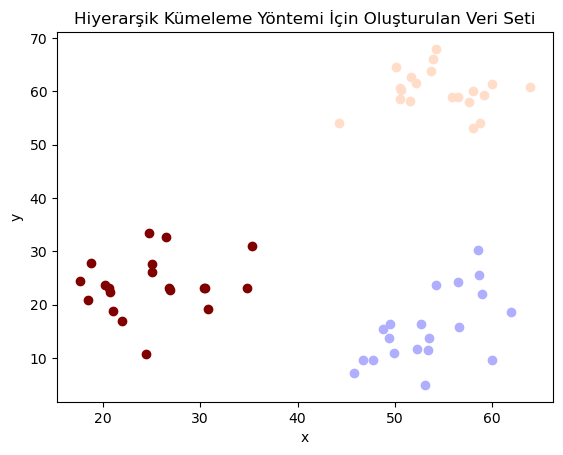

In [28]:
plt.figure()
plt.scatter(x1, y1, color = "#800000")
plt.scatter(x2, y2, color = "#ffddc9")
plt.scatter(x3, y3, color = "#b0afff")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

#### Dendogram Gösterimi

In [32]:
# %% dendogram
from scipy.cluster.hierarchy import linkage, dendrogram

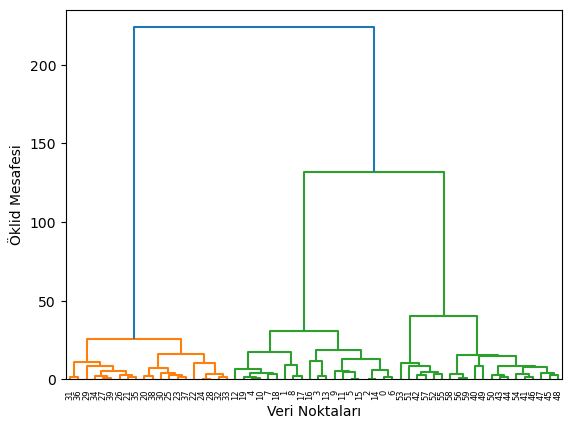

In [38]:
merg = linkage(data, method="ward")
dendrogram(merg, leaf_rotation=90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()

* Yukarıdaki şekilden yola çıkarak, en uzun yapraklardan bir kesim yaparsak 3 adet kümeye sahip olduğumuzu görebiliriz.

#### Hiyerarşik Kümeleme Algoritması Eğitimi ve Testi

In [39]:
from sklearn.cluster import AgglomerativeClustering

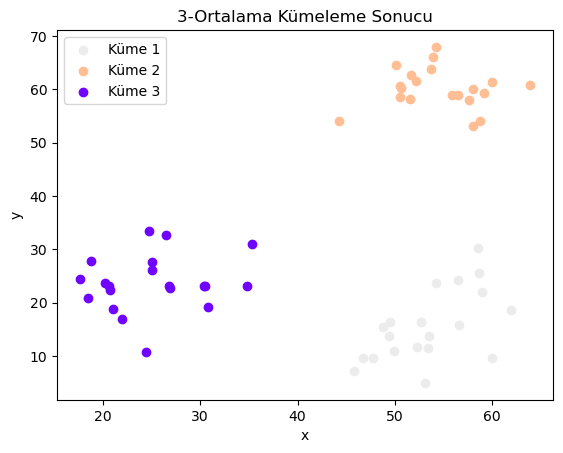

In [40]:
hiyerarsi_küme = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
kume = hiyerarsi_küme.fit_predict(data)

data["label"] = kume

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color="#ececec", label="Küme 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color="#ffbe94", label="Küme 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color="#7003ff", label="Küme 3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()